### Breast Cancer Classification con PyTorch

In [2]:
!pip install pandas==2.2.2
!pip install numpy==1.26.4
!pip install matplotlib==3.8.0
!pip install scikit-learn==1.5.0
!pip install torch==2.3.1
!pip install ucimlrepo==0.0.7


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.8/159.8 MB 2.8 MB/s eta 0:00:58
   - -------------------------------------- 4.2/159.8 MB 9.7 MB/s eta 0:00:17
   - -------------------------------------- 6.3/159.8 MB 10.7 MB/s eta 0:00:15
   -- ------------------------------------- 10.5/159.8 MB 14.5 MB/s eta 0:00:11
   -- ------------------------------------- 10.5/159.8 MB 14.5 MB/s eta 0:00:11
   --- ------------------------------------ 12.1/159.8 MB 10.5 MB/s eta 0:00:15
   ---- ----------------------------------- 16.3/159.8 MB 11.1 MB/s eta 0:00:13
   ----- ---------------------------------- 21.0/159.8 MB 13.2 MB/s eta 0:00:11
   ----- ---------------------------------- 21.0/159.8 MB 13.2 MB/s eta 0:00:11
   ------ --------------------------------- 24.1/159.8 MB 11.7 MB/s eta 0:00:12
   ------ --------------------------------- 26.2/159.8 MB 11.7 


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Carga de datos

In [20]:
from ucimlrepo import fetch_ucirepo 
  
# Obtener el conjunto de datos 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# Datos (como dataframes de pandas) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

# Mostrar las primeras filas de los datos
display(X.head())

# Mostrar las primeras filas del objetivo
display(y.head())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [21]:
display(f'X shape: {X.shape}')
display(f'y shape: {y.shape}')

'X shape: (569, 30)'

'y shape: (569, 1)'

In [22]:
display(y['Diagnosis'].value_counts())

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [23]:
import pandas as pd

# Combinar características y objetivo en un solo DataFrame para facilitar la manipulación
data = pd.concat([X, y], axis=1)

# Separar las dos clases
data_B = data[data['Diagnosis'] == 'B']
data_M = data[data['Diagnosis'] == 'M']

# Seleccionar 200 muestras de cada clase
data_B = data_B.sample(n=200, random_state=42)
data_M = data_M.sample(n=200, random_state=42)

# Combinar las dos clases
balanced_data = pd.concat([data_B, data_M])

# Mostrar el conteo de muestras por clase
display(balanced_data['Diagnosis'].value_counts())

Diagnosis
B    200
M    200
Name: count, dtype: int64

#### Procesamiento de datos

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Separar características y objetivos
X = balanced_data.drop('Diagnosis', axis=1)
y = balanced_data['Diagnosis']

# Convertir los objetivos a etiquetas binarias
y = y.map({'B': 0, 'M': 1})

# Mostrar las características
display(X)

# Mostrar las etiquetas
display(y)


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
395,14.060,17.18,89.75,609.1,0.08045,0.05361,0.026810,0.03251,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.12310,0.08460,0.07911,0.2523,0.06609
110,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.01778,0.1584,0.07065,...,11.05,21.47,71.68,367.0,0.14670,0.17650,0.13000,0.05334,0.2533,0.08468
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.029950,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.10640,0.14150,0.16730,0.08150,0.2356,0.07603
493,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
136,11.710,16.67,74.72,423.6,0.10510,0.06095,0.035920,0.02600,0.1339,0.05945,...,13.33,25.48,86.16,546.7,0.12710,0.10280,0.10460,0.06968,0.1712,0.07343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,15.320,17.27,103.20,713.3,0.13350,0.22840,0.244800,0.12420,0.2398,0.07596,...,17.73,22.66,119.80,928.8,0.17650,0.45030,0.44290,0.22290,0.3258,0.11910
328,16.270,20.71,106.90,813.7,0.11690,0.13190,0.147800,0.08488,0.1948,0.06277,...,19.28,30.38,129.80,1121.0,0.15900,0.29470,0.35970,0.15830,0.3103,0.08200
199,14.450,20.22,94.49,642.7,0.09872,0.12060,0.118000,0.05980,0.1950,0.06466,...,18.33,30.12,117.90,1044.0,0.15520,0.40560,0.49670,0.18380,0.4753,0.10130
194,14.860,23.21,100.40,671.4,0.10440,0.19800,0.169700,0.08878,0.1737,0.06672,...,16.08,27.78,118.60,784.7,0.13160,0.46480,0.45890,0.17270,0.3000,0.08701


395    0
110    0
481    0
493    0
136    0
      ..
257    1
328    1
199    1
194    1
223    1
Name: Diagnosis, Length: 400, dtype: int64

In [26]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

display(f'X_train shape: {X_train.shape}')
display(f'y_train shape: {y_train.shape}')
display(f'X_test shape: {X_test.shape}')
display(f'y_test shape: {y_test.shape}')

'X_train shape: (320, 30)'

'y_train shape: (320,)'

'X_test shape: (80, 30)'

'y_test shape: (80,)'

In [27]:
from torch.utils.data import DataLoader, TensorDataset

# Estandarizar los datos
# Inicializar el StandardScaler
scaler = StandardScaler()
# Ajustar el escalador con los datos de entrenamiento y transformarlos
X_train = scaler.fit_transform(X_train)
# Transformar los datos de prueba usando el mismo escalador
X_test = scaler.transform(X_test)

# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Crear DataLoader para los conjuntos de entrenamiento y prueba
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

#### Modelo de la red neuronal

In [ ]:
import torch.nn as nn

class ClassificationNet(nn.Module):
    def __init__(self, input_units=30, hidden_units=64, output_units=2):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_units)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Crear una instancia del modelo
model = ClassificationNet(input_units=30, hidden_units=64, output_units=2)

In [11]:
print(model)

ClassificationNet(
  (fc1): Linear(in_features=30, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)


In [ ]:
import torch.optim as optim

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    # Fase de entrenamiento
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Fase de prueba
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch [1/10], Train Loss: 0.3184, Test Loss: 0.2021
Epoch [2/10], Train Loss: 0.1245, Test Loss: 0.1483
Epoch [3/10], Train Loss: 0.0934, Test Loss: 0.1269
Epoch [4/10], Train Loss: 0.0788, Test Loss: 0.1183
Epoch [5/10], Train Loss: 0.0701, Test Loss: 0.1160
Epoch [6/10], Train Loss: 0.0639, Test Loss: 0.1054
Epoch [7/10], Train Loss: 0.0580, Test Loss: 0.1034
Epoch [8/10], Train Loss: 0.0541, Test Loss: 0.1030
Epoch [9/10], Train Loss: 0.0504, Test Loss: 0.0973
Epoch [10/10], Train Loss: 0.0464, Test Loss: 0.0933


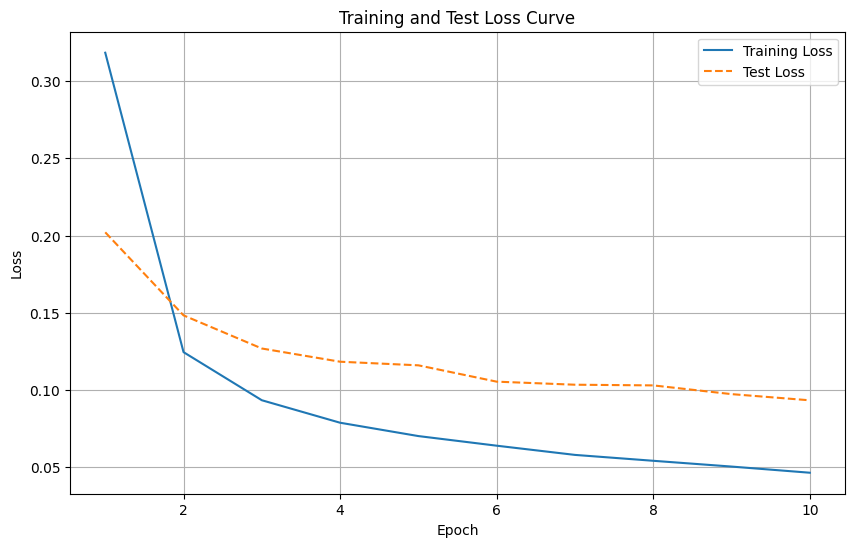

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de la curva de pérdida
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

#### Diferente optimizador

Epoch [1/10], Train Loss: 0.3716, Test Loss: 0.2849
Epoch [2/10], Train Loss: 0.1924, Test Loss: 0.2157
Epoch [3/10], Train Loss: 0.1470, Test Loss: 0.1855
Epoch [4/10], Train Loss: 0.1238, Test Loss: 0.1663
Epoch [5/10], Train Loss: 0.1107, Test Loss: 0.1563
Epoch [6/10], Train Loss: 0.1019, Test Loss: 0.1491
Epoch [7/10], Train Loss: 0.0957, Test Loss: 0.1436
Epoch [8/10], Train Loss: 0.0904, Test Loss: 0.1373
Epoch [9/10], Train Loss: 0.0862, Test Loss: 0.1329
Epoch [10/10], Train Loss: 0.0828, Test Loss: 0.1289


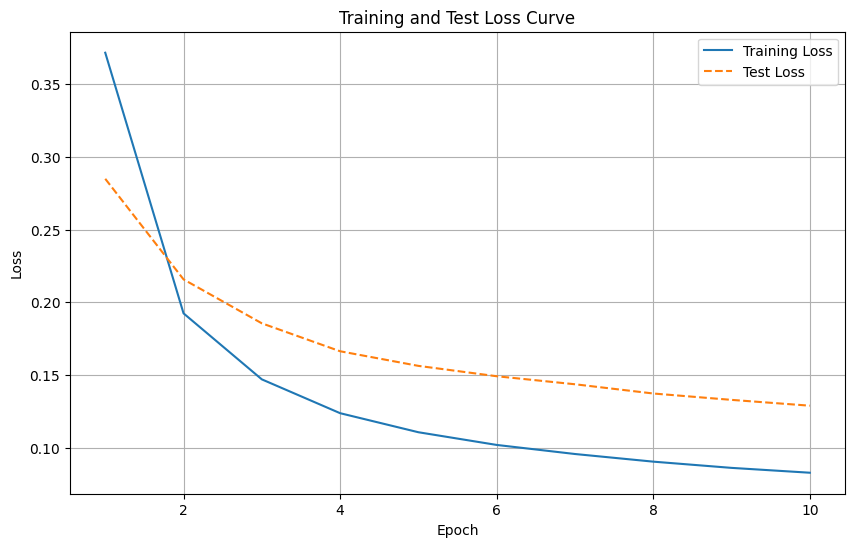

In [ ]:
import torch.optim as optim

model_new_optimizer = ClassificationNet(input_units=30, hidden_units=64, output_units=2)

# Definir la función de pérdida y el optimizador nuevo
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_new_optimizer.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001)
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    model_new_optimizer.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_new_optimizer(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    model_new_optimizer.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_new_optimizer(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

# Gráfico de la curva de pérdida con el nuevo optimizador
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

#### Diferentes números de neuronas

Epoch [1/10], Train Loss: 0.4252, Test Loss: 0.2971
Epoch [2/10], Train Loss: 0.1858, Test Loss: 0.2032
Epoch [3/10], Train Loss: 0.1307, Test Loss: 0.1626
Epoch [4/10], Train Loss: 0.1052, Test Loss: 0.1384
Epoch [5/10], Train Loss: 0.0901, Test Loss: 0.1290
Epoch [6/10], Train Loss: 0.0816, Test Loss: 0.1222
Epoch [7/10], Train Loss: 0.0757, Test Loss: 0.1186
Epoch [8/10], Train Loss: 0.0714, Test Loss: 0.1132
Epoch [9/10], Train Loss: 0.0678, Test Loss: 0.1118
Epoch [10/10], Train Loss: 0.0652, Test Loss: 0.1095


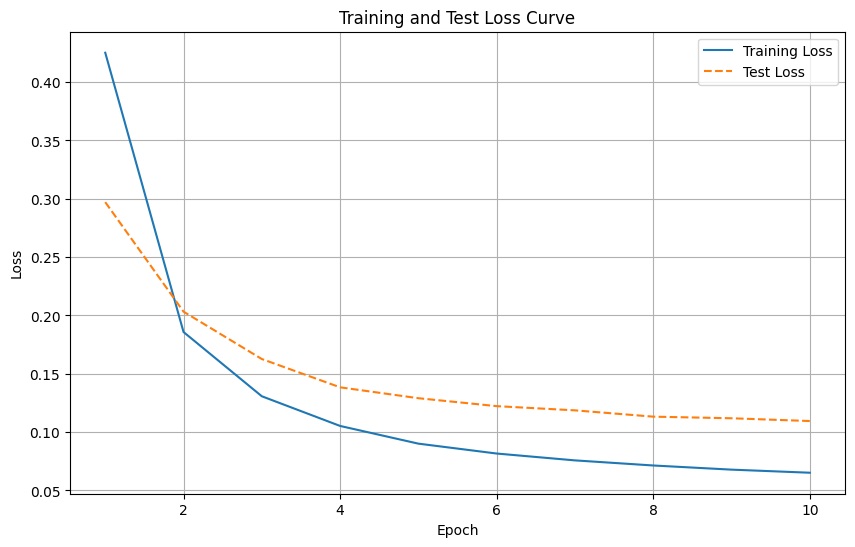

In [ ]:
# Crear una nueva instancia del modelo con diferentes parámetros
model_new = ClassificationNet(input_units=30, hidden_units=16, output_units=2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_new.parameters(), lr=0.001)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    model_new.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model_new(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    model_new.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model_new(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

import matplotlib.pyplot as plt

# Gráfico de la curva de pérdida con el nuevo modelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

#### Cambio de DataSet

In [ ]:
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()

# Extraer las características y etiquetas
X_iris = iris.data
y_iris = iris.target

Epoch [1/10], Train Loss: 1.3038, Test Loss: 1.1976
Epoch [2/10], Train Loss: 1.1511, Test Loss: 1.0863
Epoch [3/10], Train Loss: 1.0355, Test Loss: 0.9893
Epoch [4/10], Train Loss: 0.9418, Test Loss: 0.8976
Epoch [5/10], Train Loss: 0.8474, Test Loss: 0.8116
Epoch [6/10], Train Loss: 0.7590, Test Loss: 0.7329
Epoch [7/10], Train Loss: 0.6700, Test Loss: 0.6669
Epoch [8/10], Train Loss: 0.5983, Test Loss: 0.6155
Epoch [9/10], Train Loss: 0.5613, Test Loss: 0.5776
Epoch [10/10], Train Loss: 0.5178, Test Loss: 0.5471


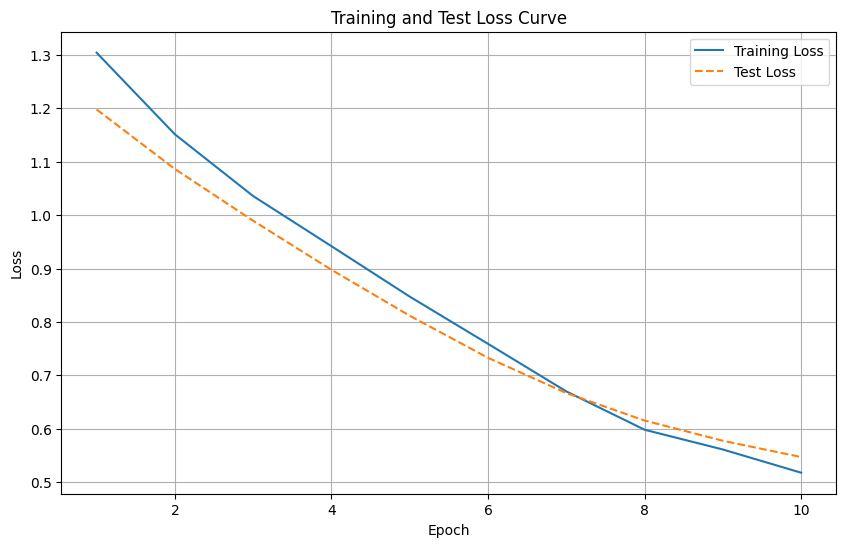

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()

# Extraer las características y etiquetas
X_iris = iris.data
y_iris = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Crear DataLoader para los conjuntos de entrenamiento y prueba
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class IrisNet(nn.Module):
    def __init__(self, hidden_units=8):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, hidden_units)  
        self.fc2 = nn.Linear(hidden_units, 3)  

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = IrisNet(hidden_units=8)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            test_outputs = model(X_batch)
            loss = criterion(test_outputs, y_batch)
            test_loss += loss.item()
    
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

# Gráfico de la curva de pérdida
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()